# Big Data Portfolio Risk and Returns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
# Big Data Stock
symbols = ['SPLK','NEWR','AYX','DOMO','ESTC','CLDR','TLND','YEXT','HDP','ORCL','MDB']
start = '2018-01-01'
end = '2019-01-01'

In [3]:
df = yf.download(symbols,start,end)['Adj Close']

[*********************100%***********************]  12 of 12 downloaded


In [4]:
#df = pd.DataFrame()
#for s in symbols:
#    df[s] = yf.download(s,start,end)['Adj Close']

In [5]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [6]:
number_of_years = delta.years

In [7]:
days = (df.index[-1] - df.index[0]).days
days

363

In [8]:
df.head()

,AYX,CLDR,DOMO,ESTC,MDB,NEWR,ORCL,SPLK,TLND,YEXT
2018-01-02,26.170000,17.389999,NaN,NaN,29.250000,58.799999,45.122593,86.629997,37.119999,11.85
2018-01-03,27.070000,17.530001,NaN,NaN,29.150000,59.220001,46.167679,88.160004,38.049999,11.75
2018-01-04,26.629999,17.250000,NaN,NaN,29.049999,58.860001,46.622482,87.949997,39.139999,11.70
2018-01-05,27.090000,17.250000,NaN,NaN,29.049999,59.310001,46.903114,87.879997,40.490002,11.59
2018-01-08,26.969999,17.150000,NaN,NaN,28.809999,58.959999,47.396618,89.980003,41.610001,11.45


In [9]:
df.tail()

,AYX,CLDR,DOMO,ESTC,MDB,NEWR,ORCL,SPLK,TLND,YEXT
2018-12-24,50.990002,10.37,16.990000,62.869999,71.779999,73.500000,41.974194,92.720001,33.000000,13.44
2018-12-26,57.480000,11.00,17.240000,68.099998,79.690002,79.529999,43.842335,99.769997,35.869999,14.11
2018-12-27,59.599998,10.95,17.370001,69.000000,82.290001,81.750000,44.215961,102.739998,35.770000,14.88
2018-12-28,58.400002,10.88,17.910000,69.989998,80.500000,80.279999,44.068474,102.790001,36.009998,14.61
2018-12-31,59.470001,11.06,19.629999,71.480003,83.739998,80.970001,44.392948,104.849998,37.080002,14.85


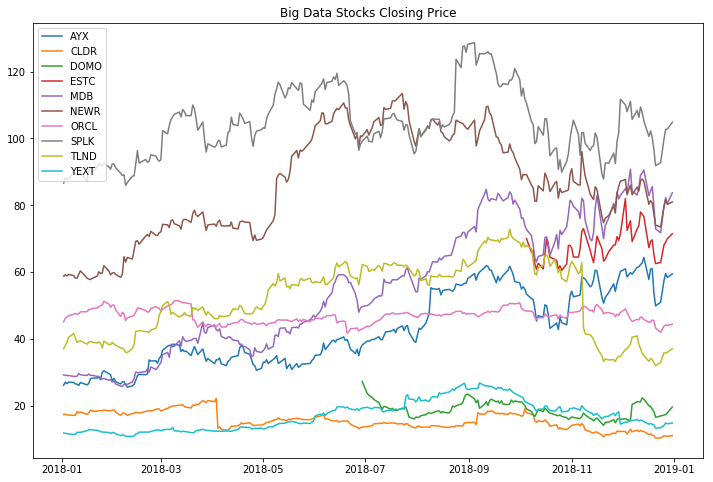

In [10]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title('Big Data Stocks Closing Price')
plt.legend(labels=df.columns)

In [11]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

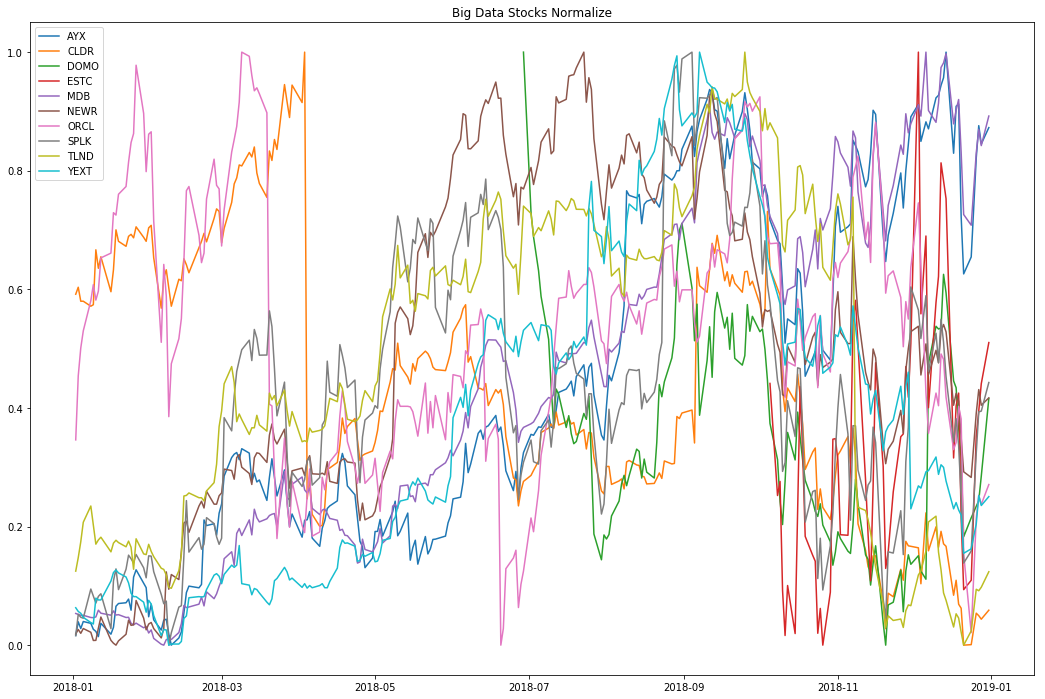

In [12]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Big Data Stocks Normalize')
plt.legend(labels=normalize.columns)

In [13]:
stock_rets = df.pct_change().dropna()

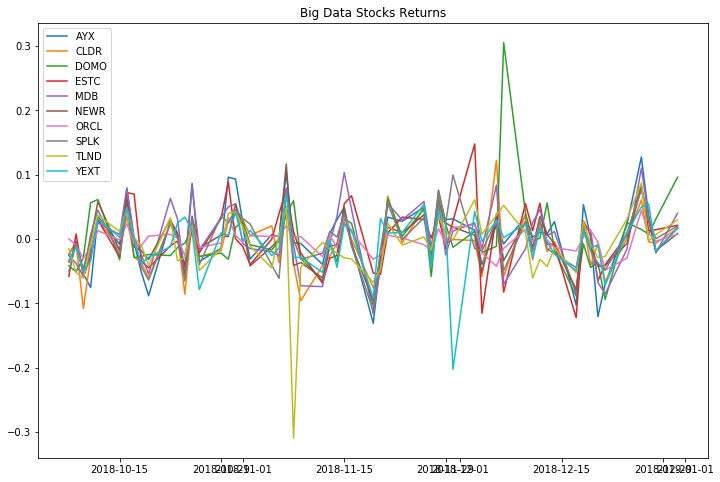

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title('Big Data Stocks Returns')
plt.legend(labels=stock_rets.columns)

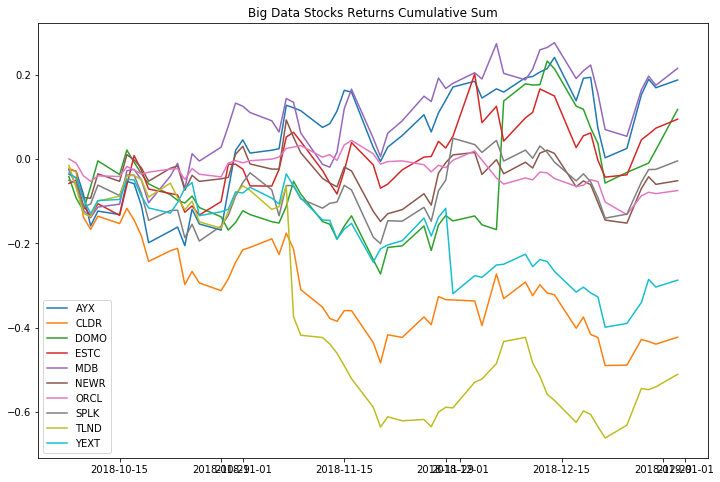

In [15]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Big Data Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

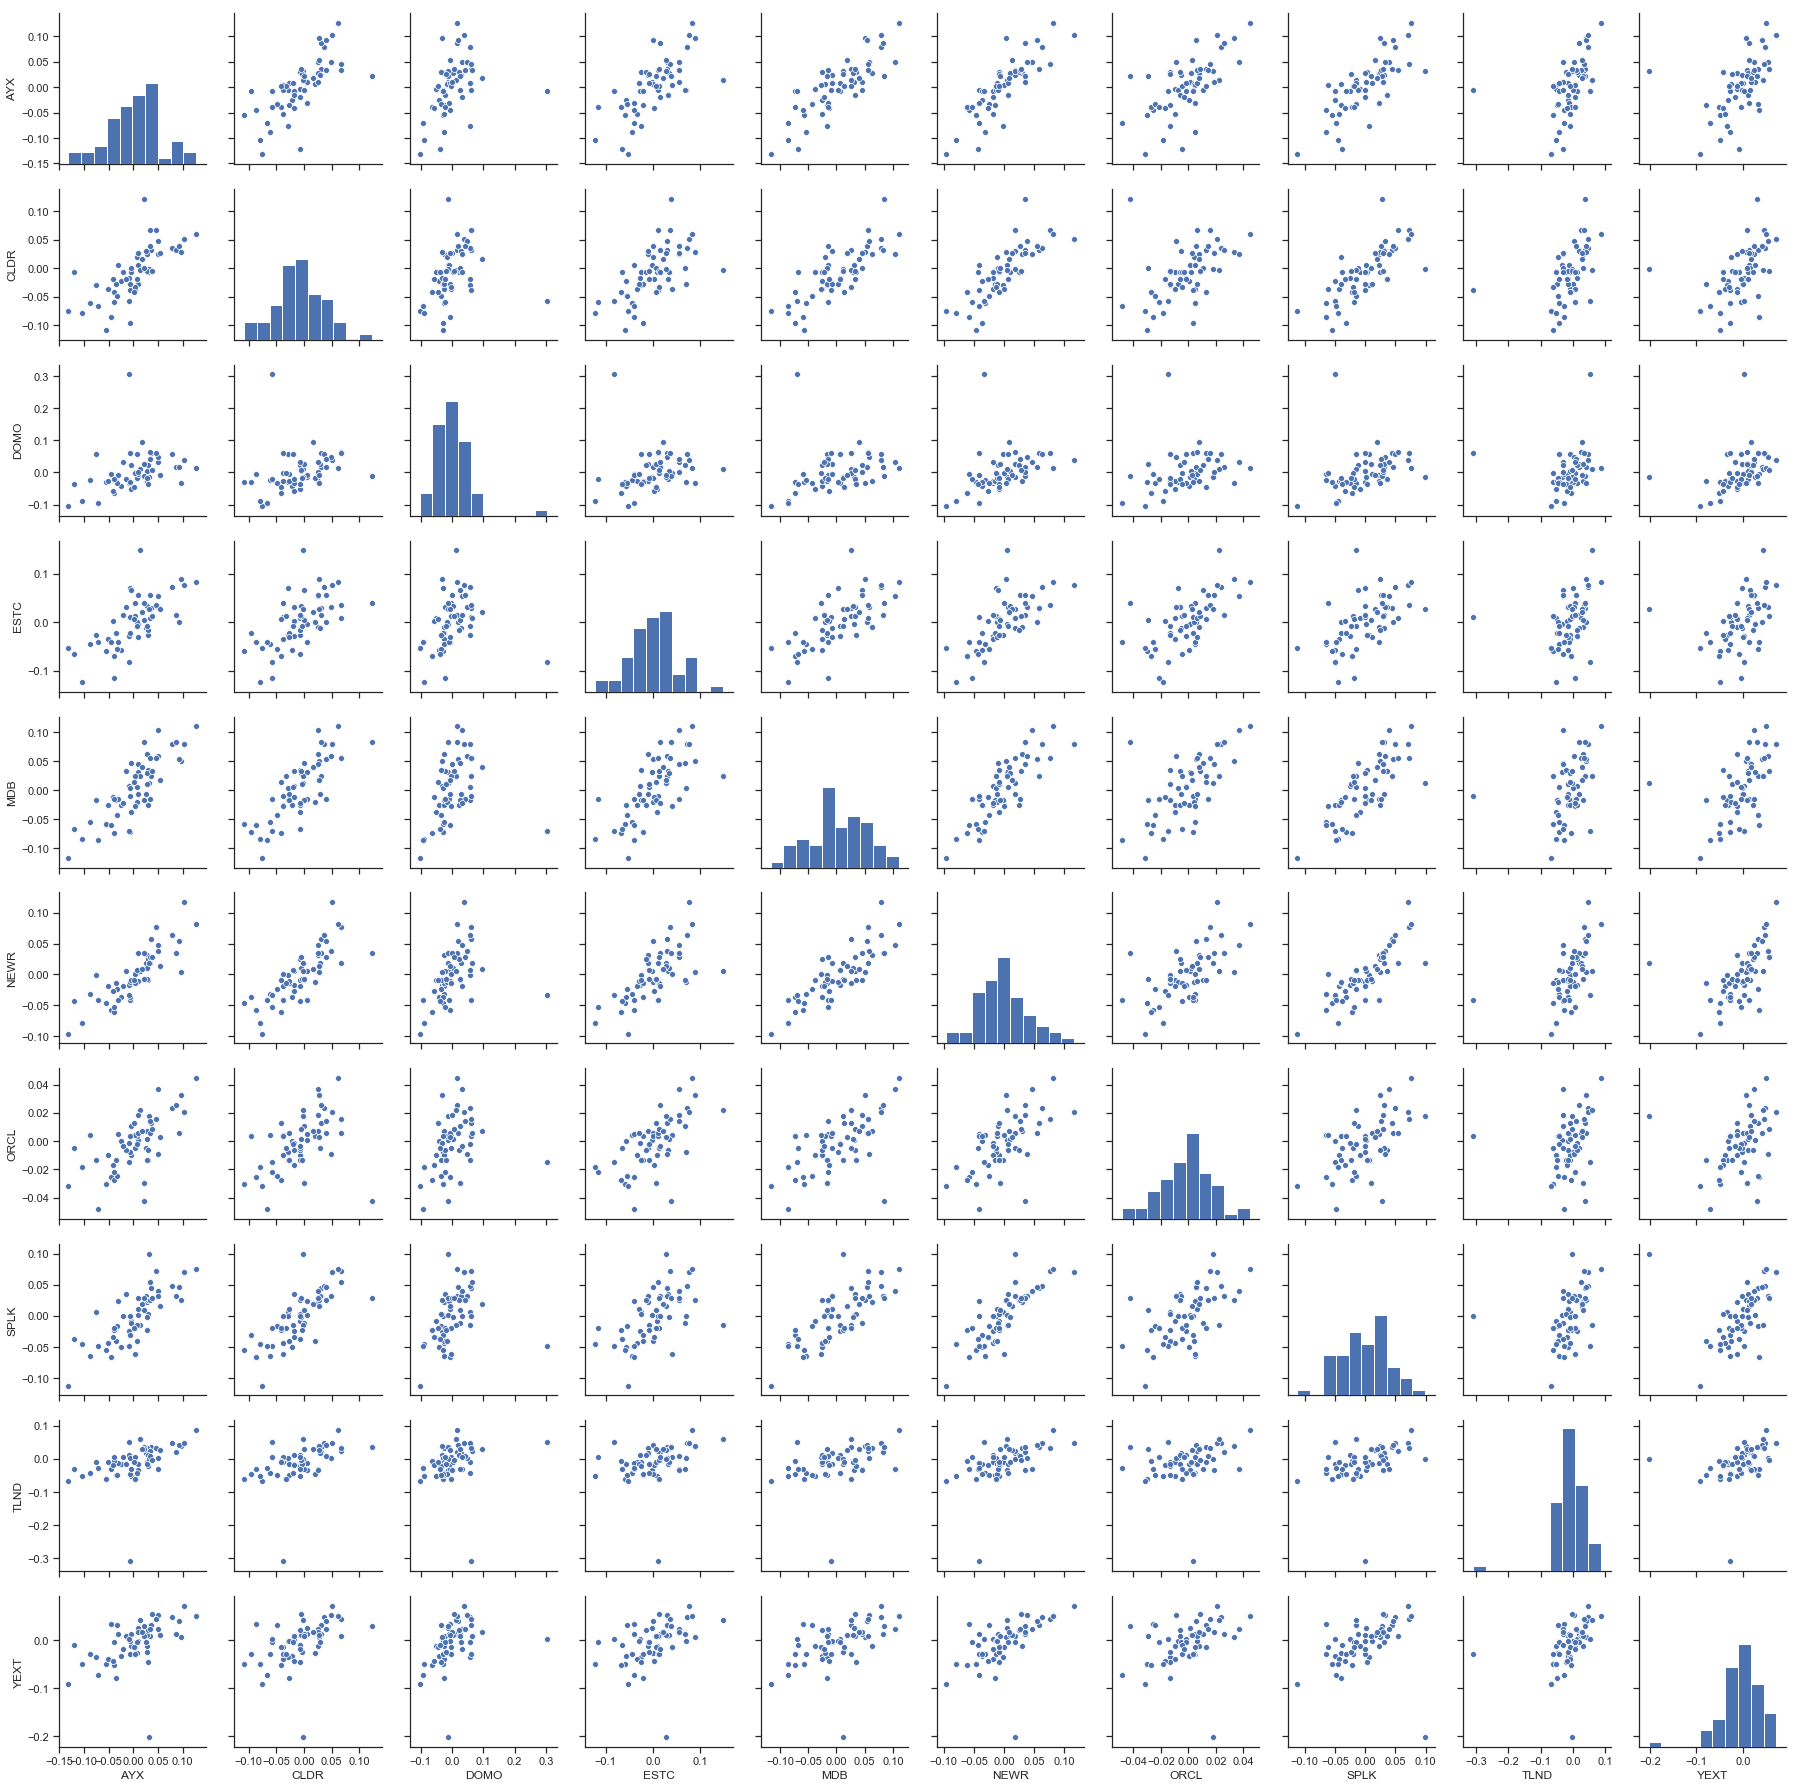

In [16]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

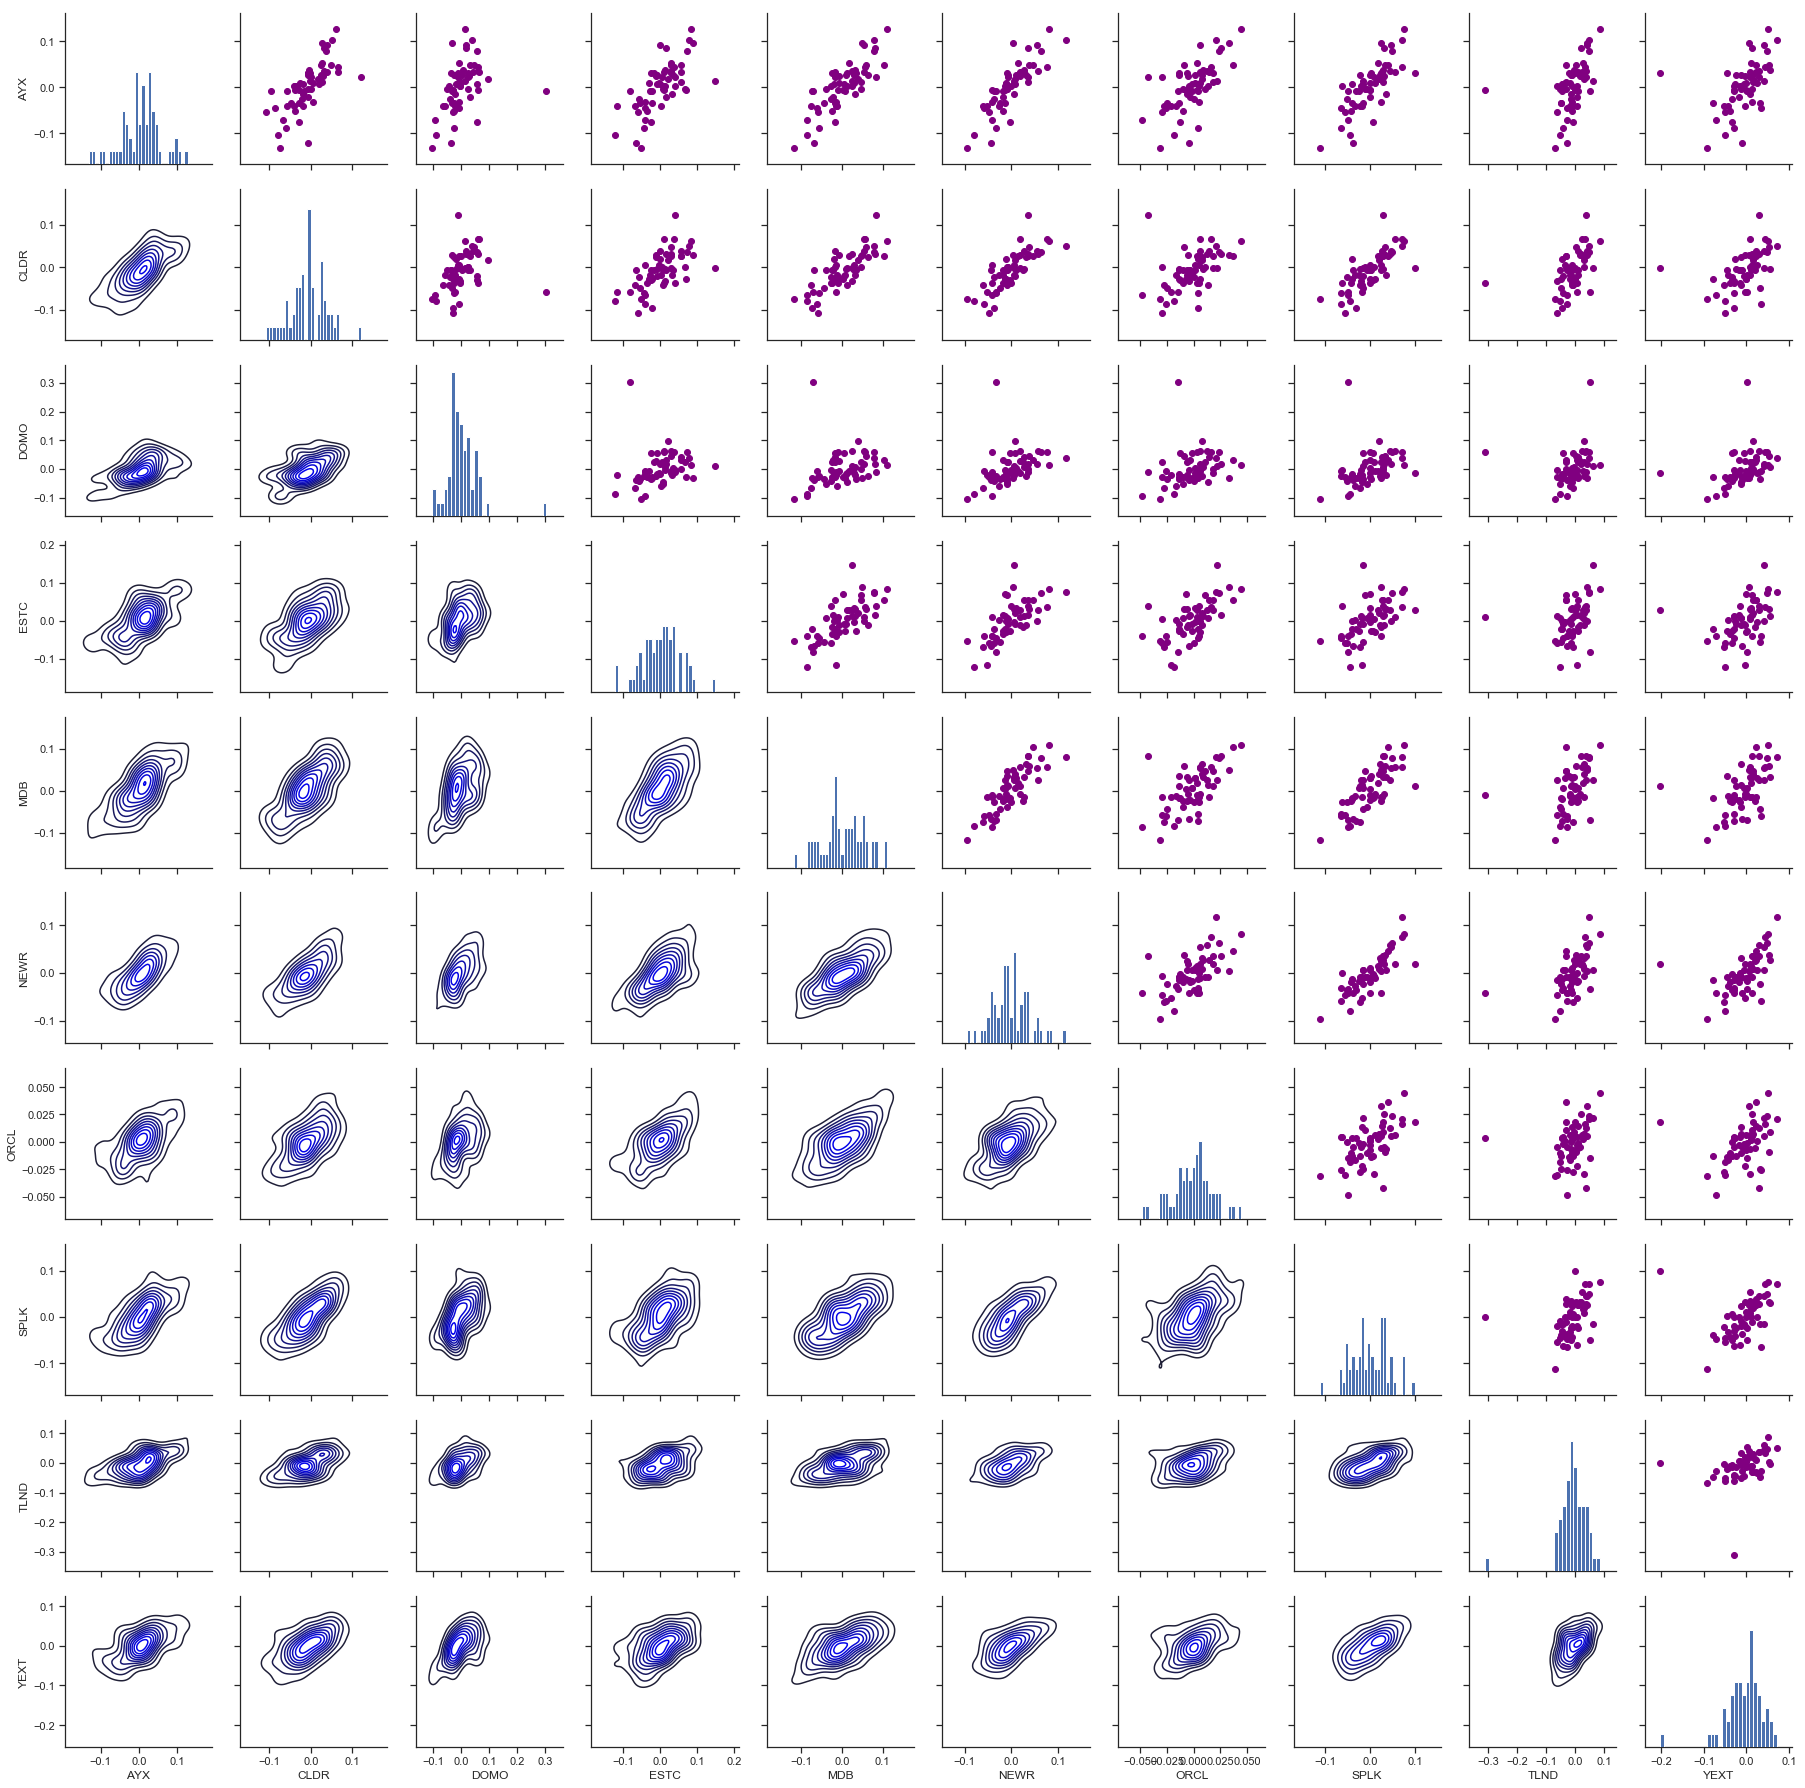

In [17]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

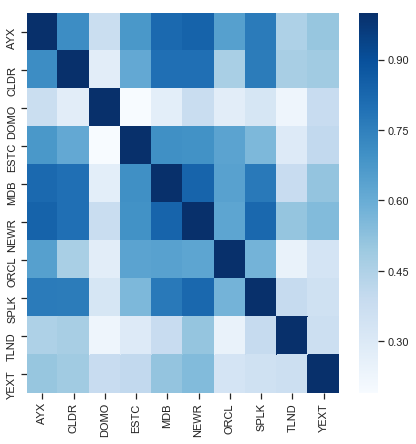

In [18]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

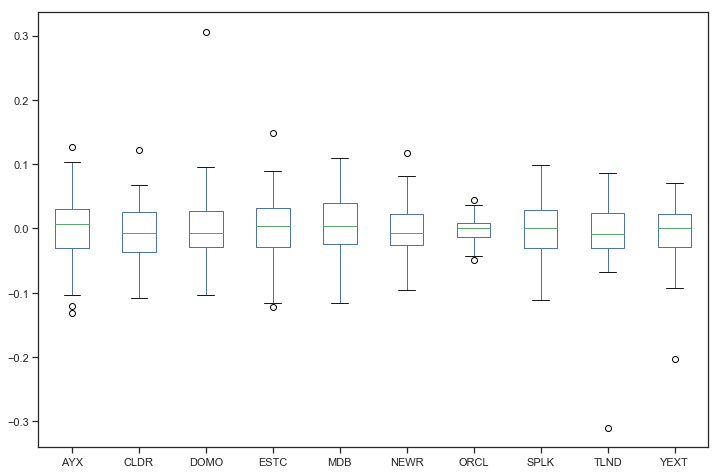

In [19]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

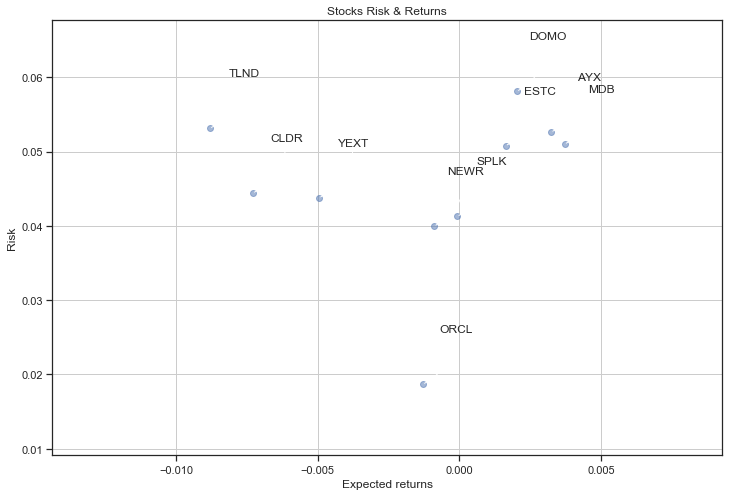

In [20]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

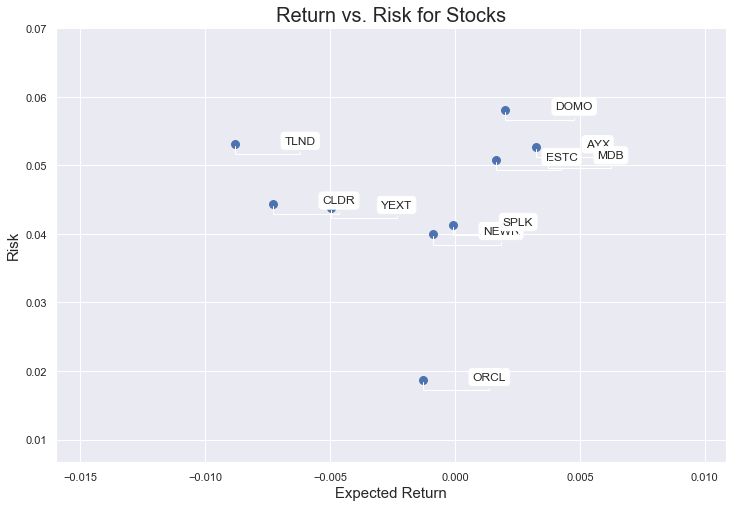

In [21]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [22]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

YEXT  YEXT    1.000000
TLND  TLND    1.000000
CLDR  CLDR    1.000000
DOMO  DOMO    1.000000
ESTC  ESTC    1.000000
MDB   MDB     1.000000
NEWR  NEWR    1.000000
ORCL  ORCL    1.000000
SPLK  SPLK    1.000000
AYX   AYX     1.000000
NEWR  AYX     0.839757
AYX   NEWR    0.839757
NEWR  MDB     0.838562
MDB   NEWR    0.838562
SPLK  NEWR    0.825942
NEWR  SPLK    0.825942
AYX   MDB     0.821357
MDB   AYX     0.821357
NEWR  CLDR    0.801571
CLDR  NEWR    0.801571
MDB   CLDR    0.800946
CLDR  MDB     0.800946
SPLK  MDB     0.773489
MDB   SPLK    0.773489
SPLK  AYX     0.768405
AYX   SPLK    0.768405
SPLK  CLDR    0.764985
CLDR  SPLK    0.764985
      AYX     0.711166
AYX   CLDR    0.711166
                ...   
TLND  MDB     0.385999
MDB   TLND    0.385999
YEXT  DOMO    0.383395
DOMO  YEXT    0.383395
NEWR  DOMO    0.382964
DOMO  NEWR    0.382964
      AYX     0.374495
AYX   DOMO    0.374495
TLND  YEXT    0.369411
YEXT  TLND    0.369411
SPLK  YEXT    0.355414
YEXT  SPLK    0.355414
ORCL  YEXT 

In [23]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,AYX,CLDR,DOMO,ESTC,MDB,NEWR,ORCL,SPLK,TLND,YEXT
2018-10-08,0.411701,0.372202,0.151382,0.238585,0.399050,0.281599,0.523354,0.290447,0.742101,0.618178
2018-10-09,0.491025,0.436850,0.129509,0.481958,0.346169,0.409913,0.414372,0.492709,0.648875,0.694922
2018-10-10,0.297658,0.000000,0.182025,0.233242,0.256698,0.231219,0.197559,0.269368,0.626512,0.557779
2018-10-11,0.214628,0.343146,0.391809,0.356765,0.438085,0.442852,0.380450,0.560434,0.760350,0.615304
2018-10-12,0.643104,0.604470,0.403683,0.563415,0.624896,0.723631,0.659160,0.742206,0.873658,0.853001


In [24]:
Normalized_Value.corr()

,AYX,CLDR,DOMO,ESTC,MDB,NEWR,ORCL,SPLK,TLND,YEXT
AYX,1.000000,0.711166,0.374495,0.677116,0.821357,0.839757,0.647294,0.768405,0.454054,0.508367
CLDR,0.711166,1.000000,0.278694,0.615171,0.800946,0.801571,0.466280,0.764985,0.471570,0.485470
DOMO,0.374495,0.278694,1.000000,0.190156,0.272076,0.382964,0.276631,0.324427,0.228751,0.383395
ESTC,0.677116,0.615171,0.190156,1.000000,0.700910,0.694637,0.633784,0.559077,0.296159,0.404563
MDB,0.821357,0.800946,0.272076,0.700910,1.000000,0.838562,0.641628,0.773489,0.385999,0.514344
NEWR,0.839757,0.801571,0.382964,0.694637,0.838562,1.000000,0.626717,0.825942,0.510230,0.549297
ORCL,0.647294,0.466280,0.276631,0.633784,0.641628,0.626717,1.000000,0.576106,0.249252,0.335501
SPLK,0.768405,0.764985,0.324427,0.559077,0.773489,0.825942,0.576106,1.000000,0.393394,0.355414
TLND,0.454054,0.471570,0.228751,0.296159,0.385999,0.510230,0.249252,0.393394,1.000000,0.369411
YEXT,0.508367,0.485470,0.383395,0.404563,0.514344,0.549297,0.335501,0.355414,0.369411,1.000000


In [25]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

YEXT  YEXT    1.000000
TLND  TLND    1.000000
CLDR  CLDR    1.000000
DOMO  DOMO    1.000000
ESTC  ESTC    1.000000
MDB   MDB     1.000000
NEWR  NEWR    1.000000
ORCL  ORCL    1.000000
SPLK  SPLK    1.000000
AYX   AYX     1.000000
NEWR  AYX     0.839757
AYX   NEWR    0.839757
NEWR  MDB     0.838562
MDB   NEWR    0.838562
SPLK  NEWR    0.825942
NEWR  SPLK    0.825942
AYX   MDB     0.821357
MDB   AYX     0.821357
NEWR  CLDR    0.801571
CLDR  NEWR    0.801571
MDB   CLDR    0.800946
CLDR  MDB     0.800946
SPLK  MDB     0.773489
MDB   SPLK    0.773489
SPLK  AYX     0.768405
AYX   SPLK    0.768405
SPLK  CLDR    0.764985
CLDR  SPLK    0.764985
      AYX     0.711166
AYX   CLDR    0.711166
                ...   
TLND  MDB     0.385999
MDB   TLND    0.385999
YEXT  DOMO    0.383395
DOMO  YEXT    0.383395
NEWR  DOMO    0.382964
DOMO  NEWR    0.382964
      AYX     0.374495
AYX   DOMO    0.374495
TLND  YEXT    0.369411
YEXT  TLND    0.369411
SPLK  YEXT    0.355414
YEXT  SPLK    0.355414
ORCL  YEXT 

In [26]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
AYX     0.003232
CLDR   -0.007291
DOMO    0.002027
ESTC    0.001629
MDB     0.003710
NEWR   -0.000889
ORCL   -0.001291
SPLK   -0.000078
TLND   -0.008810
YEXT   -0.004957
dtype: float64
--------------------------------------------------
Stock risks:
AYX     0.052644
CLDR    0.044421
DOMO    0.058110
ESTC    0.050789
MDB     0.051023
NEWR    0.039974
ORCL    0.018682
SPLK    0.041292
TLND    0.053132
YEXT    0.043776
dtype: float64


In [27]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
TLND,-0.008810,0.053132
CLDR,-0.007291,0.044421
YEXT,-0.004957,0.043776
ORCL,-0.001291,0.018682
NEWR,-0.000889,0.039974
SPLK,-0.000078,0.041292
ESTC,0.001629,0.050789
DOMO,0.002027,0.058110
AYX,0.003232,0.052644
MDB,0.003710,0.051023


In [28]:
table.sort_values(by='Risk')

,Returns,Risk
ORCL,-0.001291,0.018682
NEWR,-0.000889,0.039974
SPLK,-0.000078,0.041292
YEXT,-0.004957,0.043776
CLDR,-0.007291,0.044421
ESTC,0.001629,0.050789
MDB,0.003710,0.051023
AYX,0.003232,0.052644
TLND,-0.008810,0.053132
DOMO,0.002027,0.058110


In [29]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
AYX,0.003232,0.052644,-0.128561
CLDR,-0.007291,0.044421,-0.389244
DOMO,0.002027,0.058110,-0.137214
ESTC,0.001629,0.050789,-0.164828
MDB,0.003710,0.051023,-0.123283
NEWR,-0.000889,0.039974,-0.272407
ORCL,-0.001291,0.018682,-0.604375
SPLK,-0.000078,0.041292,-0.244068
TLND,-0.008810,0.053132,-0.354022
YEXT,-0.004957,0.043776,-0.341664


In [30]:
table['Max Returns'] = rets.max()

In [31]:
table['Min Returns'] = rets.min()

In [32]:
table['Median Returns'] = rets.median()

In [33]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
AYX,0.003232,0.052644,-0.128561,0.127280,-0.131090,0.007438,1.832190
CLDR,-0.007291,0.044421,-0.389244,0.122519,-0.108233,-0.006549,1.654412
DOMO,0.002027,0.058110,-0.137214,0.305182,-0.103849,-0.006957,9.603568
ESTC,0.001629,0.050789,-0.164828,0.147656,-0.122441,0.003453,2.128883
MDB,0.003710,0.051023,-0.123283,0.110198,-0.116405,0.004443,4.024842
NEWR,-0.000889,0.039974,-0.272407,0.116649,-0.095811,-0.007506,0.859494
ORCL,-0.001291,0.018682,-0.604375,0.044507,-0.048443,0.000623,0.736295
SPLK,-0.000078,0.041292,-0.244068,0.099380,-0.111918,0.000194,2.004083
TLND,-0.008810,0.053132,-0.354022,0.086970,-0.309539,-0.008269,2.971408
YEXT,-0.004957,0.043776,-0.341664,0.071237,-0.202636,0.000408,1.642710


In [34]:
table['Average Return Yearly'] = (1 + total_return)**(1 / number_of_years) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly
AYX,0.003232,0.052644,-0.128561,0.127280,-0.131090,0.007438,1.832190,0.018322
CLDR,-0.007291,0.044421,-0.389244,0.122519,-0.108233,-0.006549,1.654412,0.016544
DOMO,0.002027,0.058110,-0.137214,0.305182,-0.103849,-0.006957,9.603568,0.096036
ESTC,0.001629,0.050789,-0.164828,0.147656,-0.122441,0.003453,2.128883,0.021289
MDB,0.003710,0.051023,-0.123283,0.110198,-0.116405,0.004443,4.024842,0.040248
NEWR,-0.000889,0.039974,-0.272407,0.116649,-0.095811,-0.007506,0.859494,0.008595
ORCL,-0.001291,0.018682,-0.604375,0.044507,-0.048443,0.000623,0.736295,0.007363
SPLK,-0.000078,0.041292,-0.244068,0.099380,-0.111918,0.000194,2.004083,0.020041
TLND,-0.008810,0.053132,-0.354022,0.086970,-0.309539,-0.008269,2.971408,0.029714
YEXT,-0.004957,0.043776,-0.341664,0.071237,-0.202636,0.000408,1.642710,0.016427


In [35]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly,CAGR
AYX,0.003232,0.052644,-0.128561,0.127280,-0.131090,0.007438,1.832190,0.018322,0.768005
CLDR,-0.007291,0.044421,-0.389244,0.122519,-0.108233,-0.006549,1.654412,0.016544,-0.269608
DOMO,0.002027,0.058110,-0.137214,0.305182,-0.103849,-0.006957,9.603568,0.096036,NaN
ESTC,0.001629,0.050789,-0.164828,0.147656,-0.122441,0.003453,2.128883,0.021289,NaN
MDB,0.003710,0.051023,-0.123283,0.110198,-0.116405,0.004443,4.024842,0.040248,1.075498
NEWR,-0.000889,0.039974,-0.272407,0.116649,-0.095811,-0.007506,0.859494,0.008595,0.248702
ORCL,-0.001291,0.018682,-0.604375,0.044507,-0.048443,0.000623,0.736295,0.007363,-0.011254
SPLK,-0.000078,0.041292,-0.244068,0.099380,-0.111918,0.000194,2.004083,0.020041,0.141696
TLND,-0.008810,0.053132,-0.354022,0.086970,-0.309539,-0.008269,2.971408,0.029714,-0.000748
YEXT,-0.004957,0.043776,-0.341664,0.071237,-0.202636,0.000408,1.642710,0.016427,0.169604


In [36]:
table.sort_values(by='Average Return Yearly')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly,CAGR
ORCL,-0.001291,0.018682,-0.604375,0.044507,-0.048443,0.000623,0.736295,0.007363,-0.011254
NEWR,-0.000889,0.039974,-0.272407,0.116649,-0.095811,-0.007506,0.859494,0.008595,0.248702
YEXT,-0.004957,0.043776,-0.341664,0.071237,-0.202636,0.000408,1.642710,0.016427,0.169604
CLDR,-0.007291,0.044421,-0.389244,0.122519,-0.108233,-0.006549,1.654412,0.016544,-0.269608
AYX,0.003232,0.052644,-0.128561,0.127280,-0.131090,0.007438,1.832190,0.018322,0.768005
SPLK,-0.000078,0.041292,-0.244068,0.099380,-0.111918,0.000194,2.004083,0.020041,0.141696
ESTC,0.001629,0.050789,-0.164828,0.147656,-0.122441,0.003453,2.128883,0.021289,NaN
TLND,-0.008810,0.053132,-0.354022,0.086970,-0.309539,-0.008269,2.971408,0.029714,-0.000748
MDB,0.003710,0.051023,-0.123283,0.110198,-0.116405,0.004443,4.024842,0.040248,1.075498
DOMO,0.002027,0.058110,-0.137214,0.305182,-0.103849,-0.006957,9.603568,0.096036,NaN
